# KNN k-nearest neighbor
  KNN是一种基本分类与回归方法：给定一个数据训练集，对新的输入实例，在训练数据集中找到与该实例最邻近的k个实例，这k个实例的多数属于某个类，就把该输入实例分给这个类。KNN使用的模型实际上对应于特征空间的划分。  
## 模型由三个基本要素：距离度量、k值、分类决策规则决定。    
  特征空间中，每个训练点xi，距离该点比其他点更近的所有点组成一个区域，叫做区域（cell）。xi的类yi作为单元中所有点的类标记(class label)。    
* 距离度量:  
  特征空间中两个实例点的距离是两个实例点相似程度的反应。KNN一般使用欧式距离(Euclidean distance)或者是Lp距离(Lp distance)或是曼哈顿距离(Manhattan distance)。不同距离度量所确定的最近邻点是不同的。  
* k值的选择： 
  较小的k：使用较小的邻域的训练实例进行预测，学习的近似误差小，但是估计误差大，预测结果对紧邻的实例点非常敏感。如果近邻的实例点是噪声，预测则会出错。k的减小会使整体模型更复杂，容易过拟合。  
  较大的k：可以减小估计误差，但是近似误差会增大，容易发生预测的错误，k增大使模型简单化。  
* 分类决策规则：  
  多数表决规则（majority voting rule）：由输入实例的k个邻近的训练实例中的多数类决定输入实例的类。等价于经验风险最小化。  

## kd树——KNN的实现  
  KNN实现时，主要考虑的问题是如何对训练数据进行快速k近邻搜索。当特征空间维数大，训练数据量大时尤其必要。KNN最简单的实现方法是线性扫描（linear scan），计算实例和每一个训练实例的距离，但是计算量大。  
  为了提高效率，减少计算距离的次数，使用kd tree的方法。  
  基本思想：  
  1. 给定目标点，搜索近邻，首先找到包含目标点的叶节点；  
  2. 从该节点出发，依次回退到父节点；
  3. 不断查找与目标点最近邻的节点，在确定不可能存在更接近的结点时终止。
  * Example：
  ![kd tree.png](./kd tree-1.png)
  
  

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from collections import Counter

In [6]:
iris_data = datasets.load_iris()
iris = pd.DataFrame(np.column_stack((iris_data.data, iris_data.target)), columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'label'])
data = np.array(iris.iloc[:100, [0, 1, -1]])
x, y = data[:, :-1], data[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [39]:
print(y_test)

[0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0.]


In [67]:
class KNN:
    def __init__(self, x_train, y_train, n_n = 3, p = 2):
        #n_n: nearest neighbors
        #p: distance
        self.x_train = x_train
        self.y_train = y_train
        self.n = n_n
        self.p = p

    def predict(self, x):
        my_list = []
        for i in range(self.n):
            dist = np.linalg.norm(x - self.x_train[i], ord = self.p) # np.linalg.norm求范数
            my_list.append((dist, self.y_train[i]))
            
        for i in range(self.n, len(self.x_train)):
            max_index = my_list.index(max(my_list, key = lambda x : x[0])) # 选择出list中范数最大的点的索引
            dist = np.linalg.norm(x - self.x_train[i], ord = self.p)
            if my_list[max_index][0] > dist:
                my_list[max_index] = (dist, self.y_train[i])
                
        my_label = [k[-1] for k in my_list]
        new_count = Counter(my_label)
        max_count = sorted(new_count, key = lambda x : x)[-1]
        return max_count
        
    def score(self, x_test, y_test):
        right_count = 0
        for x, y in zip(x_test, y_test): # zip(a, b)将a,b 打包为元组的列表
            label = self.predict(x)
            if label == y:
                right_count += 1
        return right_count / len(x_test)
    

In [68]:
my_c = KNN(x_train, y_train)

In [69]:
my_c.score(x_test, y_test)

1.0

In [73]:
test_point1 = [6.0, 3.0]# label == 1
test_point2 = [5.0, 3.5]# label == 0
print('Test Point: {}'.format(my_c.predict(test_point1)))
print('Test Point: {}'.format(my_c.predict(test_point2)))

Test Point: 1.0
Test Point: 0.0


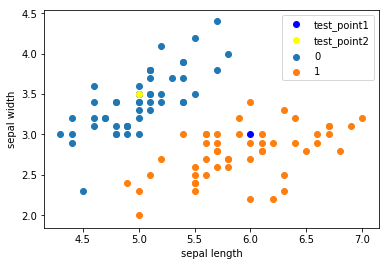

In [74]:
plt.scatter(iris[:50]['sepal length (cm)'], iris[:50]['sepal width (cm)'], label='0')
plt.scatter(iris[50:100]['sepal length (cm)'], iris[50:100]['sepal width (cm)'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.plot(test_point1[0], test_point1[1], 'bo', label='test_point1')
plt.plot(test_point2[0], test_point2[1], 'bo', color = 'yellow', label='test_point2')
plt.legend()